# German Ebay Car Sales 2016

The Data-Set contains offerings of used cars in germany (20 attributes, 371528 examples). These cars where submitted to the website 'ebay Kleinanzeigen' and have been crawled between 2016-03-05 and 2016-04-07.

The dataset can be found here:
https://www.kaggle.com/orgesleka/used-cars-database

### Importing a crap tone of libraries
If you are running this for the first time, you will need to install alot of applications for the libraries that follow. You can run this in your python console, be wary that some may take a while.

In [33]:
pip install wheel
pip install squarify
pip install pygal
pip install pywaffle
pip install pipwin
pip install plotly
pipwin install numpy
pipwin install pandas
pipwin install shapely
pipwin install gdal
pipwin install fiona
pipwin install pyproj
pipwin install six
pipwin install rtree
pipwin install descartes
pipwin install geopandas

SyntaxError: invalid syntax (<ipython-input-33-3f95db62e3b7>, line 1)

In [34]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import seaborn as sns
from sklearn import preprocessing
import squarify
import geopandas as gp
import shapely
import fiona
import pygal
from pywaffle import Waffle
import plotly.express as px

%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)
saved_style_state = matplotlib.rcParams.copy()


### Getting the Files
This is just a small code to pull up the csv file. It will print "File not found!" if the file isnt found in the OpenDataProject Directory


In [35]:
#Getting the Car data File
filepath = "autos.csv"
cardata= pd.read_csv(filepath)
print("Successfully Loaded Car CSV")

#Getting the Map Files
shp_file_name = "plz-gebiete.shp"
germanburbs = gp.GeoDataFrame.from_file(shp_file_name)
print("Successfully Loaded Map Shape File")

Successfully Loaded Car CSV
Successfully Loaded Map Shape File


Here is a view of the dataset. It was created using a webscraper on ebay germany. I found an explanation of the columns online as there was a couple weird entries in german, and odd coulumns including 'abtest'

- dateCrawled         : when advert was first crawled, all field-values are taken from this date \n
- name                : headline, which the owner of the car gave to the advert \n
- seller              : 'privat'(ger)/'private'(en) or 'gewerblich'(ger)/'dealer'(en) \n
- offerType           : 'Angebot'(ger)/'offer'(en) or 'Gesuch'(ger)/'request'(en)
- price               : the price on the advert to sell the car
- abtest              : ebay-intern variable (argumentation in discussion-section)
- vehicleType         : one of eight vehicle-categories 
- yearOfRegistration  : at which year the car was first registered
- gearbox             : 'manuell'(ger)/'manual'(en) or 'automatik'(ger)/'automatic'(en)
- powerPS             : the power of the car in PS
- model               : the cars model
- kilometer           : how many kilometres the car has driven
- monthOfRegistration : at which month the car was first registered
- fuelType            : one of seven fuel-categories
- brand               : the cars brand
- notRepairedDamage   : if the car has a damage which is not repaired yet
- dateCreated         : the date for which the advert at 'ebay Kleinanzeigen' was created
- nrOfPictures        : number of pictures in the advert
- postalCode          : where in germany the car is located
- lastSeenOnline      : when the crawler saw this advert last online



In [36]:
cardata.head(10)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3T�RER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
5,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,650,test,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07
6,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,privat,Angebot,2200,test,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39
7,2016-03-21 18:54:38,VW_Derby_Bj_80__Scheunenfund,privat,Angebot,0,test,limousine,1980,manuell,50,andere,40000,7,benzin,volkswagen,nein,2016-03-21 00:00:00,0,19348,2016-03-25 16:47:58
8,2016-04-04 23:42:13,Ford_C___Max_Titanium_1_0_L_EcoBoost,privat,Angebot,14500,control,bus,2014,manuell,125,c_max,30000,8,benzin,ford,NaN,2016-04-04 00:00:00,0,94505,2016-04-04 23:42:13
9,2016-03-17 10:53:50,VW_Golf_4_5_tuerig_zu_verkaufen_mit_Anhaengerk...,privat,Angebot,999,test,kleinwagen,1998,manuell,101,golf,150000,0,NaN,volkswagen,NaN,2016-03-17 00:00:00,0,27472,2016-03-31 17:17:06


## Simple Car Sales Comparisons

Below are some initial data analysis from simple characteristics provided in the german car data csv

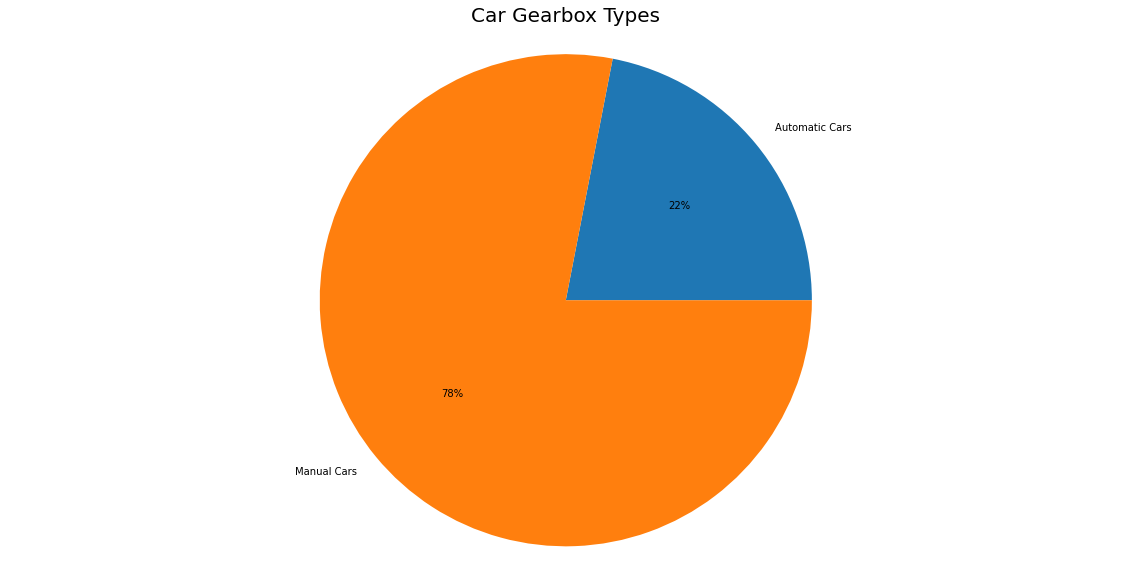

<Figure size 432x216 with 0 Axes>

In [37]:
df = cardata["gearbox"]

man_num = df.str.count("manuell").sum()
aut_num = df.str.count("automatik").sum()

counts = [int(aut_num), int(man_num)]
my_labels = ['Automatic Cars', 'Manual Cars']
plt.pie(counts,labels=my_labels,autopct='%.0f%%')
plt.title('Car Gearbox Types',fontsize=20)
plt.axis('equal')
fig= plt.figure(figsize=(6,3))
plt.show()

#### So interestingly around 70% of people drive Manual Cars in Germany

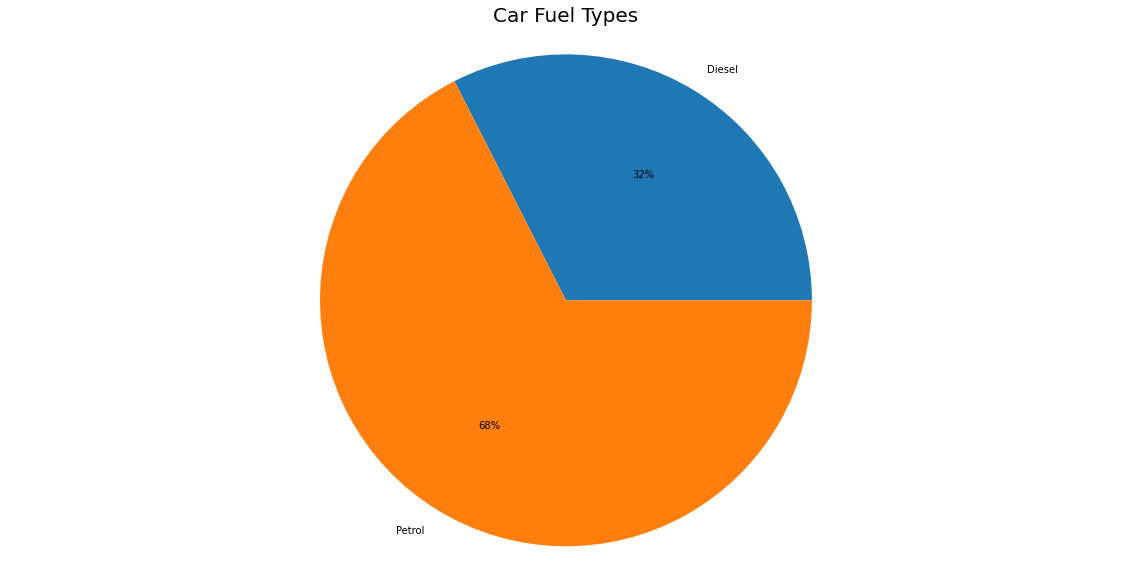

<Figure size 432x216 with 0 Axes>

In [38]:
df = cardata["fuelType"]

diesel_num = df.str.count("diesel").sum()
petrol_num = df.str.count("benzin").sum()


counts = [int(diesel_num), int(petrol_num)]
my_labels = ['Diesel', 'Petrol']
plt.pie(counts,labels=my_labels,autopct='%.0f%%')
plt.title('Car Fuel Types',fontsize=20)
plt.axis('equal')
fig= plt.figure(figsize=(6,3))
plt.show()

#### And around 70% of cars are petrol run. This dataset does not include electic vehicles, which have increase in production significantly since this data was recorded in 2016

Text(0, 0.5, 'Quantity of Cars')

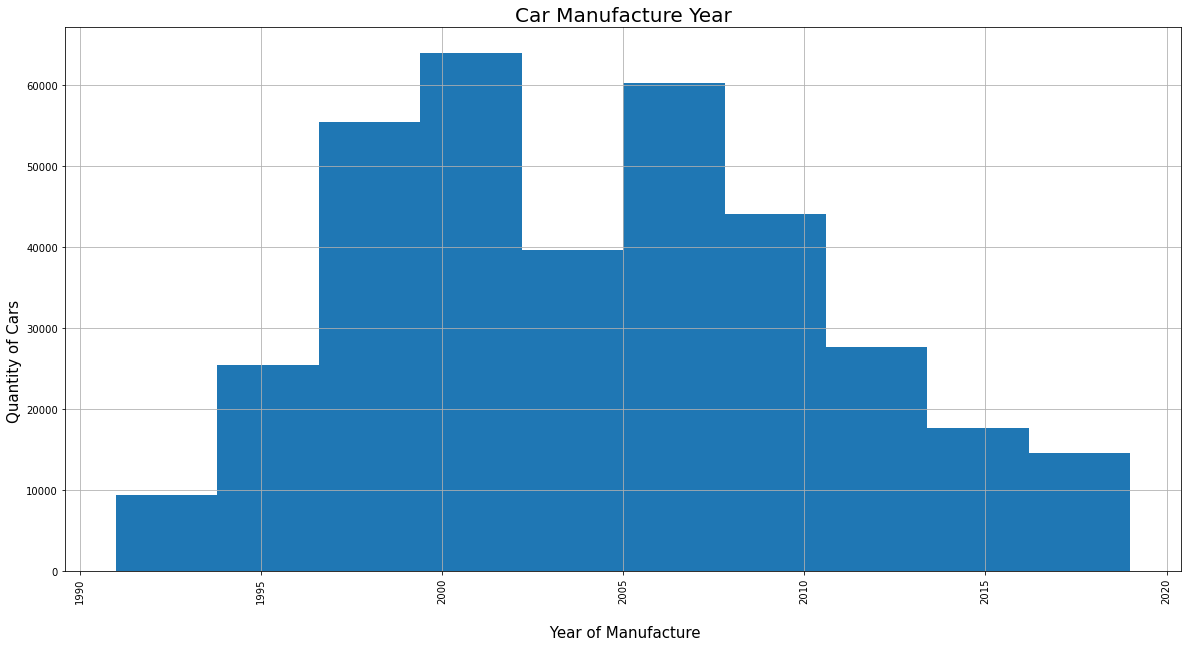

In [39]:
cardata["yearOfRegistration"][cardata["yearOfRegistration"] >1990 ][cardata["yearOfRegistration"] < 2020].hist()

plt.xticks(fontsize=10, rotation='90')
plt.title("Car Manufacture Year", fontsize=20)
plt.xlabel('\n Year of Manufacture', fontsize=15)
plt.ylabel('Quantity of Cars', fontsize=15, rotation='vertical', ha='right')



Text(0, 0.5, 'Quantity of Cars')

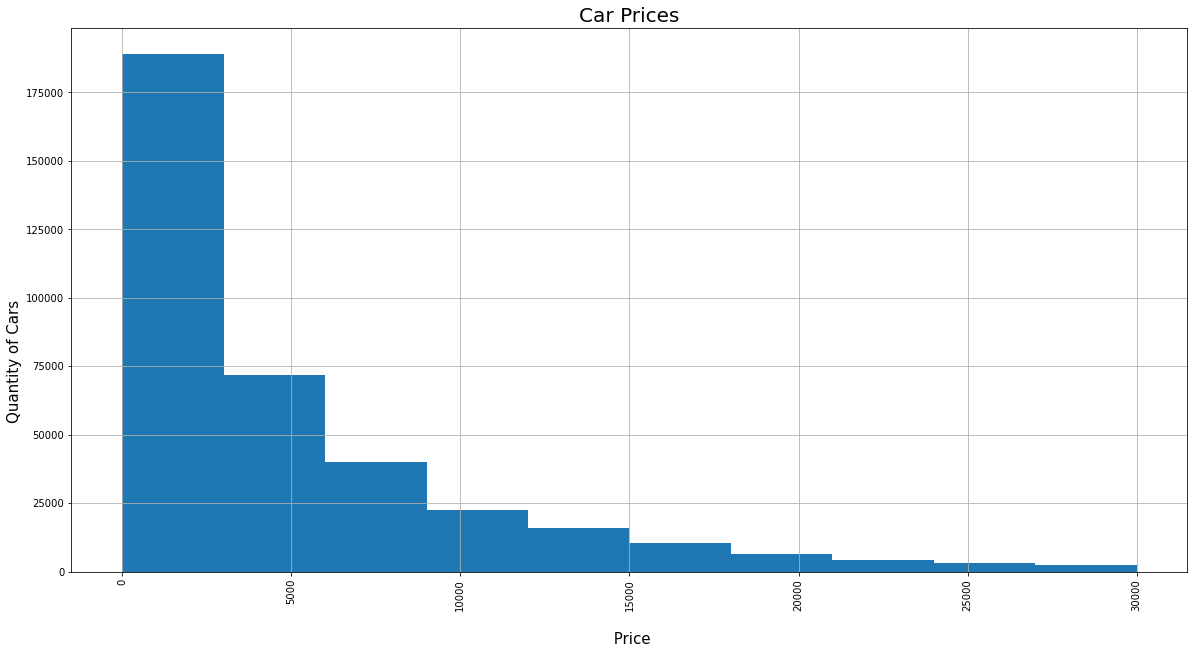

In [40]:
cardata["price"][cardata["price"] <30000 ].hist()

plt.xticks(fontsize=10, rotation='90')
plt.title("Car Prices", fontsize=20 )
plt.xlabel('\n Price', fontsize=15 )
plt.ylabel('Quantity of Cars', fontsize=15, rotation='vertical', ha='right')

Text(0, 0.5, 'Quantity of Cars')

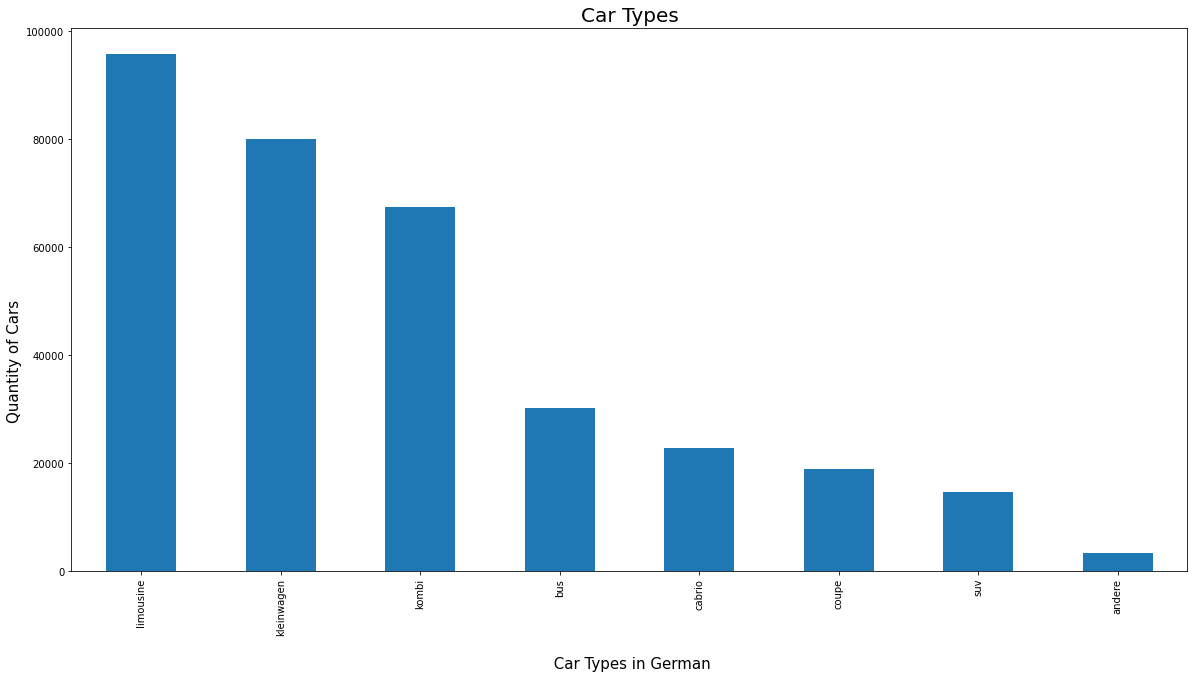

In [41]:
cardata["vehicleType"].value_counts().plot(kind="bar")

plt.xticks(fontsize=10, rotation='90')
plt.title("Car Types", fontsize=20 )
plt.xlabel('\n Car Types in German', fontsize=15 )
plt.ylabel('Quantity of Cars', fontsize=15, rotation='vertical', ha='right')

Text(0, 0.5, 'Quantity of Cars')

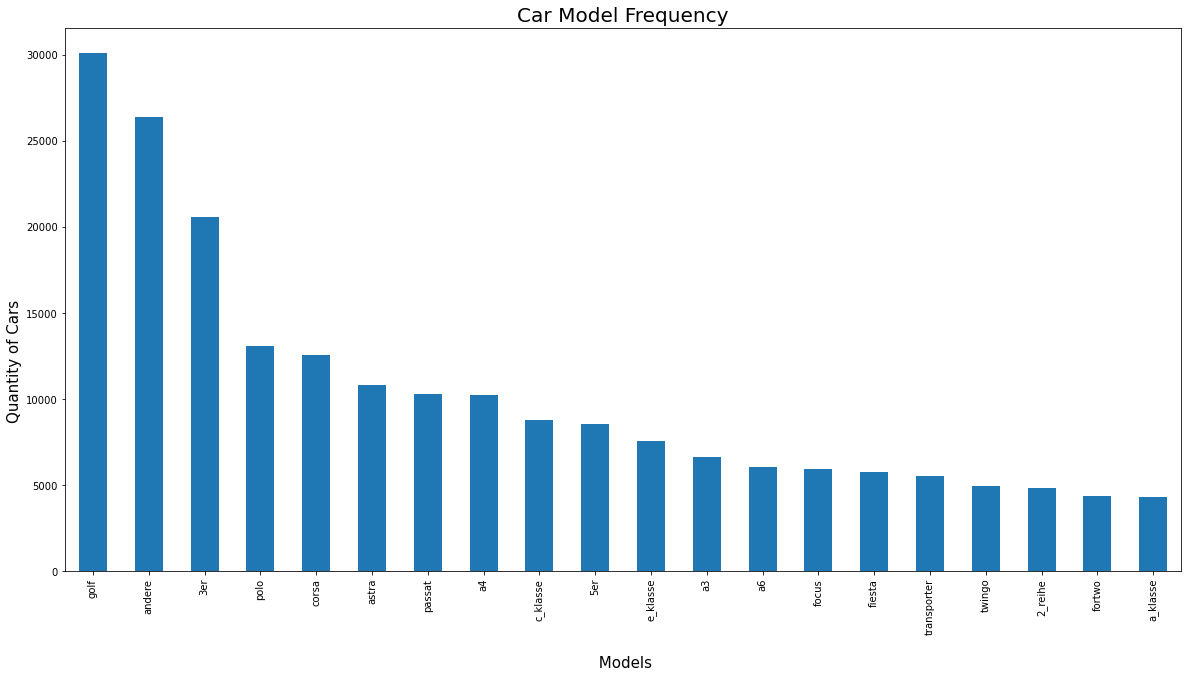

In [55]:
e = cardata["model"].value_counts()
e = e.nlargest(20)
e.plot(kind="bar")

plt.xticks(fontsize=10, rotation='90')
plt.title("Car Model Frequency", fontsize=20 )
plt.xlabel('\n Models', fontsize=15 )
plt.ylabel('Quantity of Cars', fontsize=15, rotation='vertical', ha='right')

Text(0, 0.5, 'Quantity of Cars')

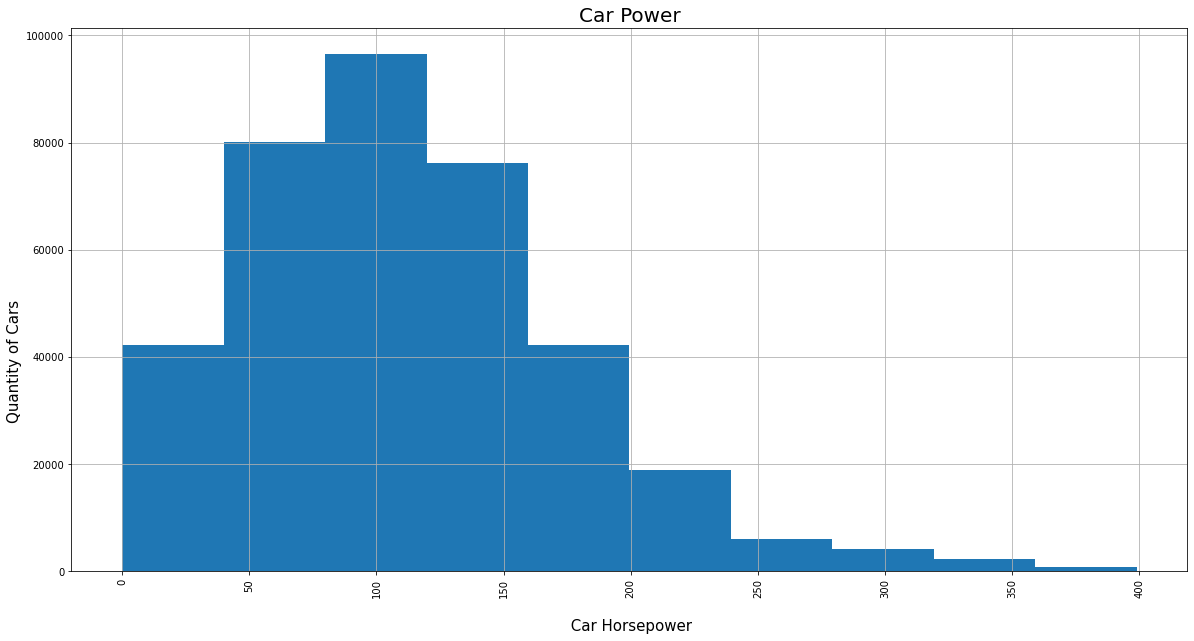

In [43]:
cardata["powerPS"][cardata["powerPS"] <400 ].hist()

plt.xticks(fontsize=10, rotation='90')
plt.title("Car Power", fontsize=20 )
plt.xlabel('\n Car Horsepower', fontsize=15)
plt.ylabel('Quantity of Cars', fontsize=15, rotation='vertical', ha='right')

Text(0, 0.5, 'Quantity of Cars')

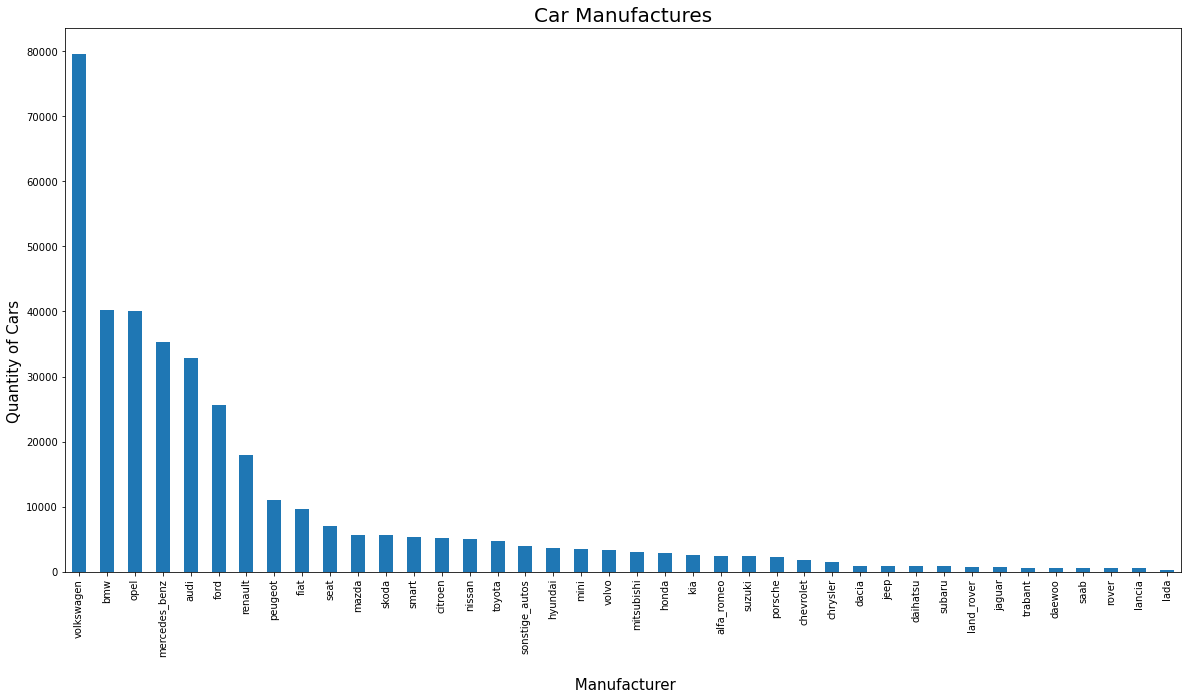

In [44]:
cardata["brand"].value_counts().plot(kind="bar")

plt.xticks(fontsize=10, rotation='90')
plt.title("Car Manufactures", fontsize=20 )
plt.xlabel('\n Manufacturer', fontsize=15)
plt.ylabel('Quantity of Cars', fontsize=15, rotation='vertical', ha='right')

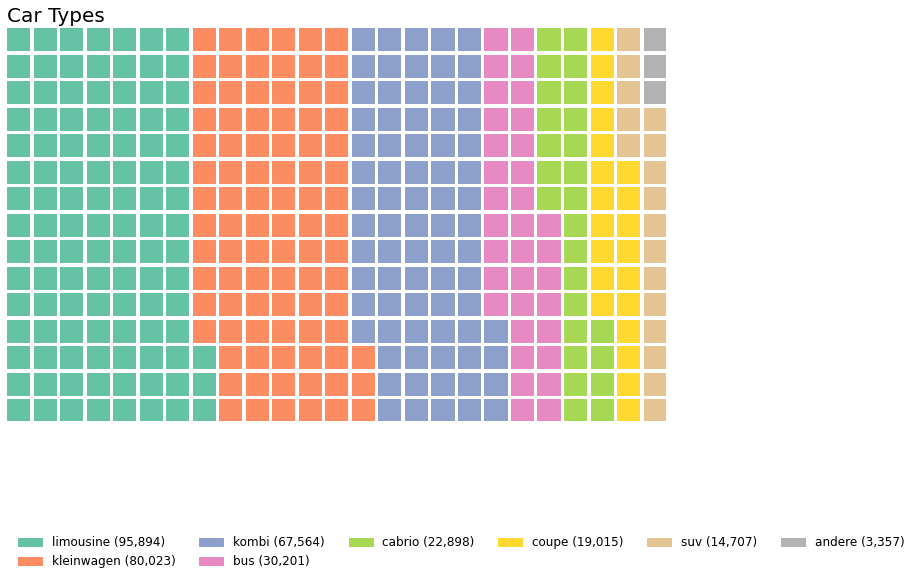

In [45]:
Typecounts = cardata['vehicleType'].value_counts().rename_axis('vehicleType').reset_index(name='count')
data = dict(zip(Typecounts['vehicleType'], Typecounts['count']))
fig = plt.figure(FigureClass=Waffle,
                 figsize=(18,8),
                 rows=15,
                 columns=25,
                 values=Typecounts['count'],
                 title={'label': 'Car Types',
                        'loc': 'left',
                        'fontdict': {'fontsize': 20}},
                 labels=["{} ({:,})".format(k, v) for k, v in data.items()],
                 legend={'loc': 'lower left',
                         'bbox_to_anchor': (0, -0.4),
                         'ncol': 6,
                         'framealpha': 0,
                         'fontsize': 12})

## Car Brand Analysis

I found the car brands particularly interesting so in this section i filteres the brand data from the original csv and created a new dataset, and made some interesting graphs and comparisons

I am going to make a graph of car sales on mannufactures parent companies. Below is a list of car brands and their corresponding parent companies

- toyota : palexus, daihatsu, toyota
- general motors : chevrolet, buic, cadillac, holden, hsv
- volkswagen : bentley, skoda, audi, lamborghini, bugatti, porshe, volkswagen
- fiat chrysler automobiles : jeep, fiat, dodge, abarth, lancia, alpha_romeo, chrysler
- psa group : peugeot, citreon, opel, vauxhall
- daimler : mercedes_benz, smart, maybach
- bmw : bmw, mini, rolls_royce
- group renault : nissan, infiniti, mitsubishi, renault
- Tata motors : land rover, jaguar
- hyundai : hyundai, kia, genesis
- geely : volvo, lotus
- fuji heavy industries : subaru
- independants : everyone else

In [46]:
#making some ugly functions
def brandcounter(braand):
    sum = cardata["brand"].str.count(braand).sum()
    return sum

def parentcounterlists(listofbrands):
    brandlist = []
    for i in listofbrands:
        brandlist.append(brandcounter(i))
        sum1 = sum(brandlist)
    return sum1

def parentcounterlistsoflists(listlistofbrands):
    brandlist = []
    for i in listlistofbrands:
        brandlist.append(parentcounterlists(i))
    return brandlist
#parent company and car lists
parent_companies = [
"Toyota", 
"General Motors", 
"Volkswagen",
"Fiat\nChrysler\nAutomobiles", 
"PSA Group", 
"Daimler",
"BMW",
"Group Renault",
"Tata Motors",
"Hyundai",
"Geely", 
"Fuji\nHeavy\nIndustries", 
"Independants" 
]

parent_company_cars = [
["palexus", "daihatsu", "toyota"],
["chevrolet", "buic", "cadillac", "holden", "hsv"],
["bentley", "skoda", "audi", "lamborghini", "bugatti", "porshe", "volkswagen"],
["jeep", "fiat", "dodge", "abarth", "lancia", "alpha_romeo", "chrysler"],
["peugeot", "citroen", "opel", "vauxhall"],
["mercedes_benz", "smart", "maybach"],
["bmw", "mini", "rolls_royce"],
["nissan", "infiniti", "mitsubishi", "renault"],
["land rover", "jaguar"],
["hyundai", "kia", "genesis"],
["volvo", "lotus"],
["subaru"]
]
#Making a new clean dataset 

# This was done by searching brands from parent_company_cars and counting them in the german car data csv

parent_count = list(parentcounterlistsoflists(parent_company_cars))

independant_count = len(cardata["brand"]) - sum(parent_count)
parent_count.append(independant_count)  
    
#Reorganising Data for another Graph
data = cardata["brand"].value_counts()
data1 = data.index.tolist()
data2 = data.tolist()
data3 = []
for i in data1:

    if i in (item for sublist in parent_company_cars for item in sublist):
        f = next(((j, car.index(i))
              for j, car in enumerate(parent_company_cars)
              if i in car),
             None)
        f = f[0]
        data3.append(parent_companies[f])
    else:
        data3.append('Independant') 

brand = pd.DataFrame({'Parent Companies': data3 , 'Quantity of Cars': data2 , 'Car Brand': data1})


Text(0.5, 1.0, 'Car Family Manufactures')

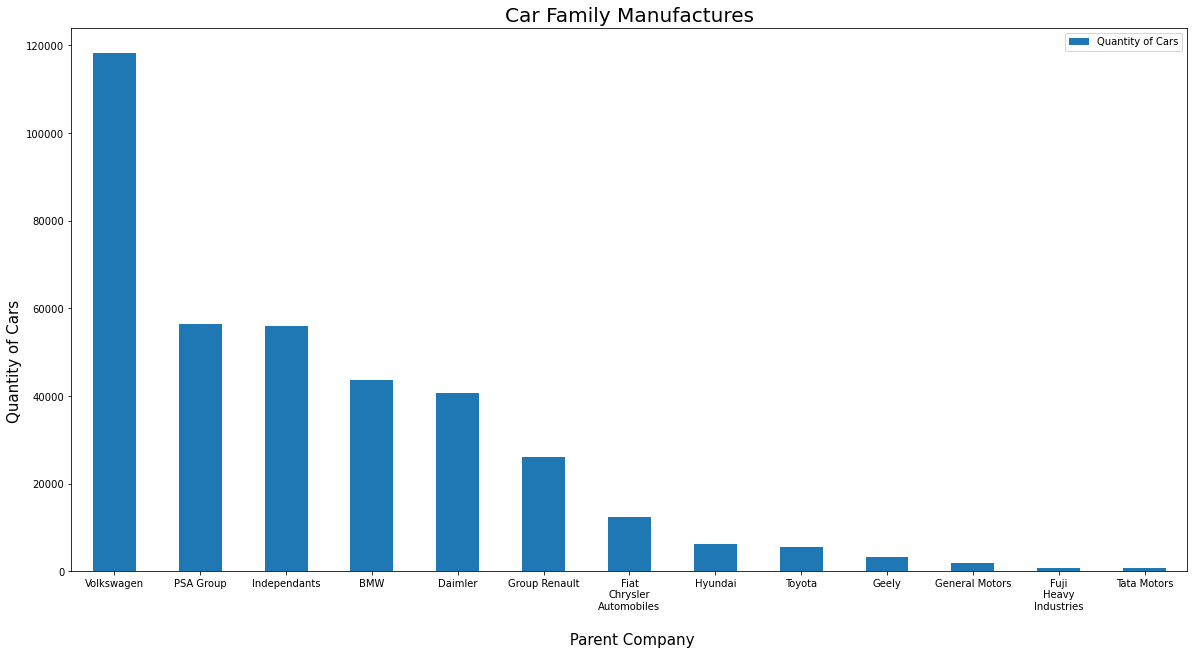

In [47]:
#Finally Plotting it
df = pd.DataFrame({'Parent Companies': parent_companies , 'Quantity of Cars': parent_count})
df.sort_values('Quantity of Cars',inplace= True, ascending = False)
ax = df.plot.bar(x='Parent Companies',  rot=0, width = 0.5)
plt.xlabel('\n Parent Company', fontsize=15)
plt.ylabel('Quantity of Cars', fontsize=15, rotation='vertical', ha='right')
plt.title("Car Family Manufactures", fontsize=20 )

I found the representation of this data in the above table quite simplistic so i explored some different graphs including some cool things called Treemaps :)

In [48]:
brand.head()

,Parent Companies,Quantity of Cars,Car Brand
0,Volkswagen,79640,volkswagen
1,BMW,40274,bmw
2,PSA Group,40136,opel
3,Daimler,35309,mercedes_benz
4,Volkswagen,32873,audi


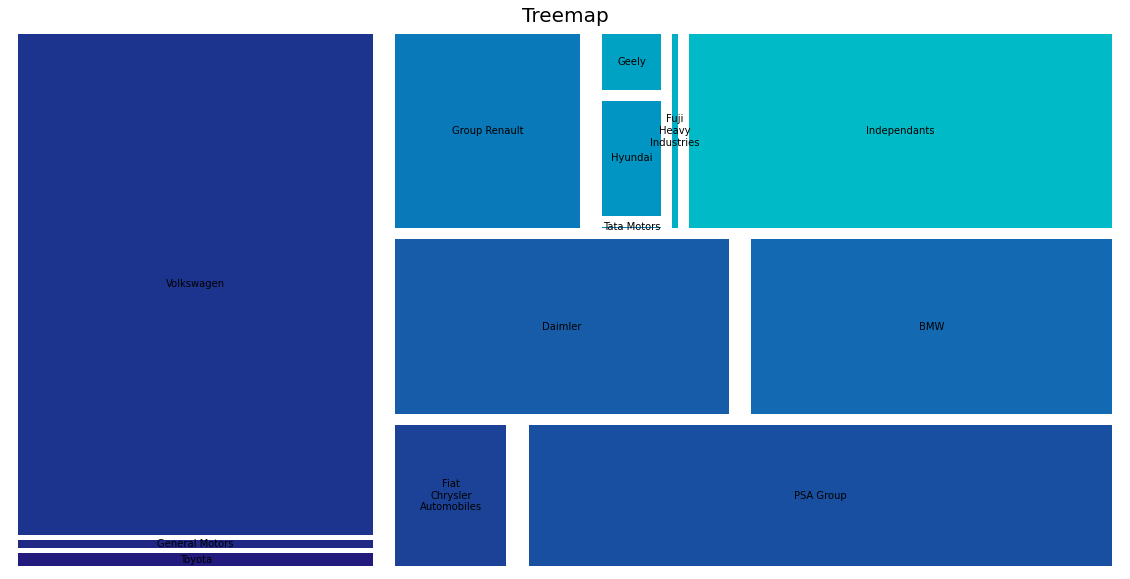

In [49]:
plt.figure(figsize=(20,10))
squarify.plot(sizes=parent_count,
              color=['#221A7C','#202785','#1D348E','#1B4297', '#184FA0', '#165CA9'  , '#1369B2', '#0979B9',"#0089c0", '#0095C2', '#00A2C4', '#00AEC5', \
         '#00BAC7', '#16C0C5','#2BC5C3', '#41CBC0', '#56D0BE', '#6CD6BC', '#77DABB',  '#83DEBA', '#8EE1B8',  '#9AE5B7', \
          '#A5E9B6', '#B0EDB5', '#BCF0B3', '#C7F4B2', '#CCF5B4', '#D1F7B6', '#DCFAB9', '#E6FCBD', '#F0FFC0'],
              label=parent_companies,
              pad=True)

plt.title('Treemap', fontsize=20 )
plt.axis('off');

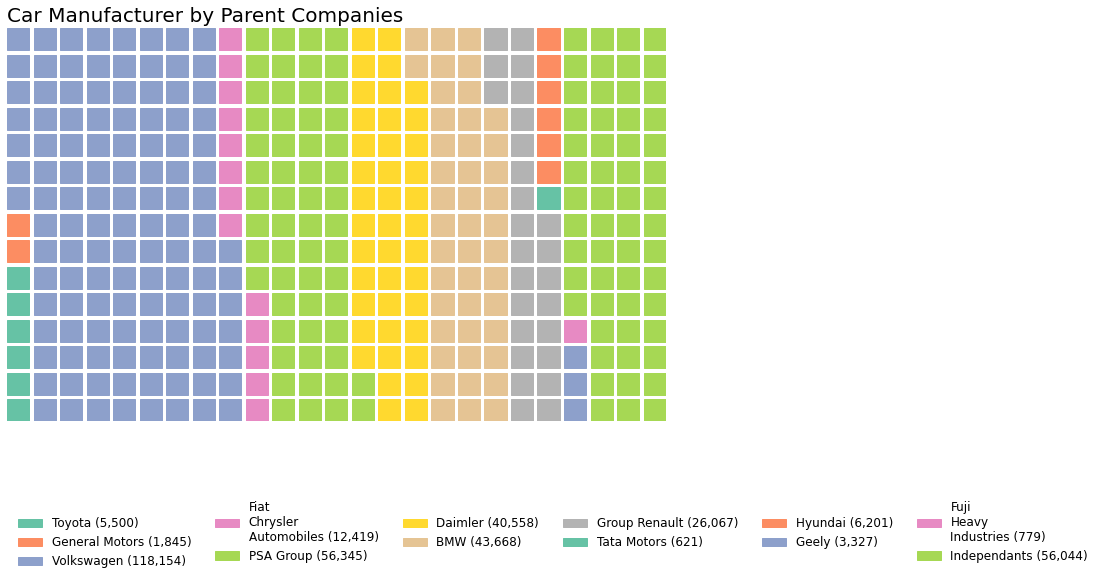

In [50]:
data = dict(zip(parent_companies, parent_count))
fig = plt.figure(FigureClass=Waffle,
                 figsize=(18,8),
                 rows=15,
                 columns=25,
                 values=parent_count,
                 title={'label': 'Car Manufacturer by Parent Companies',
                        'loc': 'left',
                        'fontdict': {'fontsize': 20}},
                 labels=["{} ({:,})".format(k, v) for k, v in data.items()],
                 legend={'loc': 'lower left',
                         'bbox_to_anchor': (0, -0.4),
                         'ncol': 6,
                         'framealpha': 0,
                         'fontsize': 12})

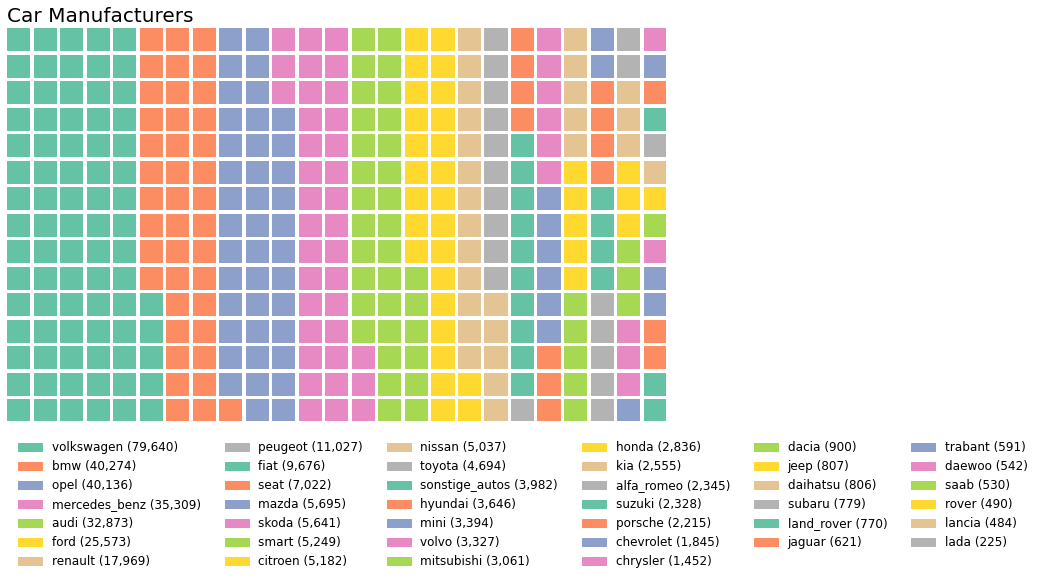

In [51]:
data = dict(zip(data1,data2))
fig = plt.figure(FigureClass=Waffle,
                 figsize=(18,8),
                 rows=15,
                 columns=25,
                 values=data2,
                 title={'label': 'Car Manufacturers',
                        'loc': 'left',
                        'fontdict': {'fontsize': 20}},
                 labels=["{} ({:,})".format(k, v) for k, v in data.items()],
                 legend={'loc': 'lower left',
                         'bbox_to_anchor': (0, -0.4),
                         'ncol': 6,
                         'framealpha': 0,
                         'fontsize': 12})

In [52]:
fig = px.treemap(brand, 
                 path=['Parent Companies', 'Car Brand'], 
                 values='Quantity of Cars' ,
                #  color='Quantity of Cars'
                )
fig.show()

Text(0.5, 1.0, 'Car Family Manufactures')

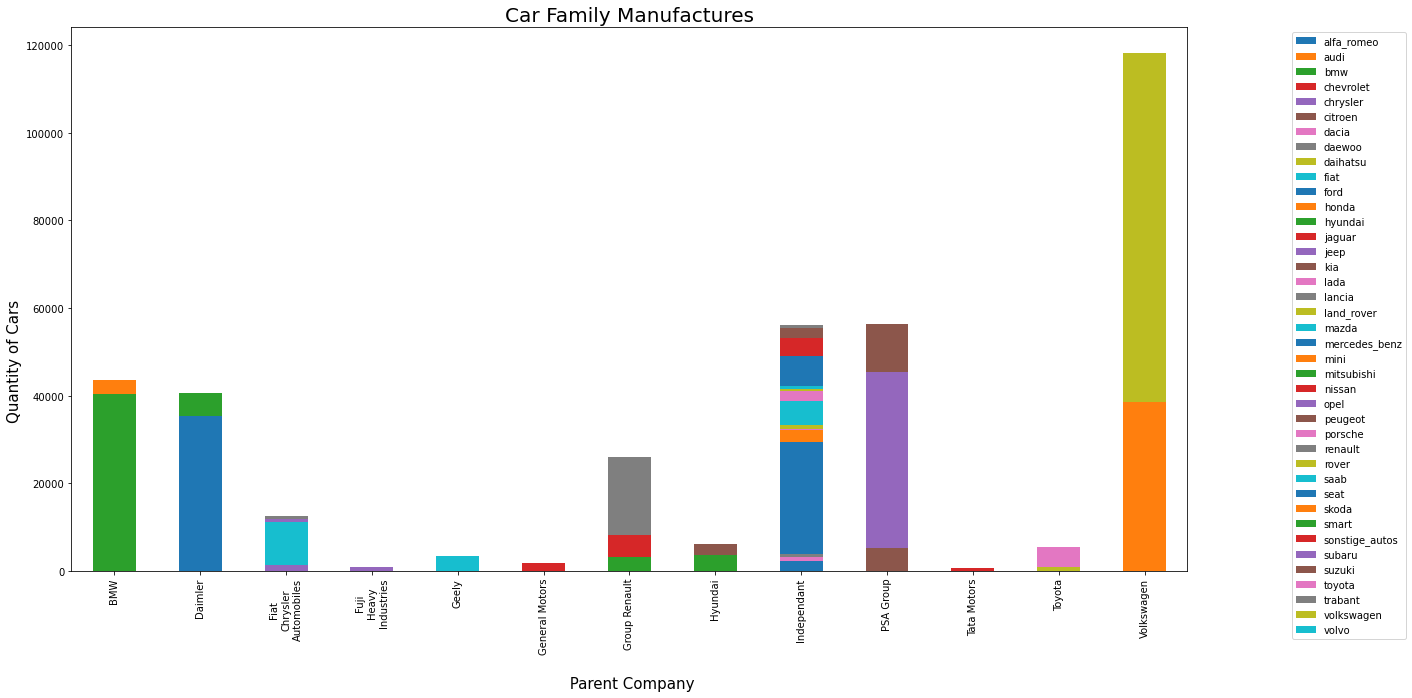

In [53]:
df1 = pd.pivot_table(brand, values='Quantity of Cars', index='Parent Companies', columns='Car Brand')
df1.plot(kind='bar', stacked=True).legend(bbox_to_anchor=(1.2, 1))
plt.xlabel('\n Parent Company', fontsize=15)
plt.ylabel('Quantity of Cars', fontsize=15, rotation='vertical', ha='right')
plt.title("Car Family Manufactures", fontsize=20 )
#rectangle artists


In [ ]:
#I tried sorting it, but it took too long
# sort = brand.groupby('Parent Companies').sum().sort_values('Quantity of Cars', ascending = False).index
# df1 = pd.pivot_table(brand, values='Quantity of Cars', index='Parent Companies', columns='Car Brand').reindex(sort_list) 
# df1.plot(kind='bar', stacked=True).legend(bbox_to_anchor=(1.2, 1))
# plt.xlabel('\n Parent Company', fontsize=15)
# plt.ylabel('Quantity of Cars', fontsize=15, rotation='vertical', ha='right')
# plt.title("Car Family Manufactures", fontsize=20 )

# Maps

I found a map shape file of Germany that included corresponding postal codes that i could link to my car data. I found the shape file here (the site is in German, you might want to translate it):
https://www.suche-postleitzahl.org/downloads



Probably dont run the following cell as it takes a while, but you will see a massive shape file of germany

In [ ]:
germanburbs.geometry.plot()

In [ ]:
germanburbs.head()

## Adding Car data to the Map
Trying to add a count of sales and other information in each postcode. I aim to further add other characteristics like comparing the most prominant car brands regionally

In [ ]:
#Really rough distribution of car sales via postal code
df = cardata["postalCode"]
df.hist()

In [ ]:
#This is a function that will run from a lamda that will count the number of cars sold in each postcode
cardata["postalCode"] = cardata["postalCode"].astype(str)
counts = cardata['postalCode'].value_counts().rename_axis('postalCode').reset_index(name='count')
plist = counts['postalCode'].tolist()
def pccounter(pcode):
    pcode = str(pcode)
    if pcode in plist:
        num = counts.loc[counts['postalCode'] == pcode, 'count'].iloc[0]
        return num
    else:
        return 0


In [ ]:
#This is the lambda function that adds the count column
germanburbs['count'] = germanburbs.apply(lambda x: pccounter(x['plz']), axis=1)


In [ ]:

# I had to write all these down manually as i got the error when trying to make a function that alters a dataframe
# 'DataFrame' objects are mutable, thus they cannot be hashed

#Resorting Data into mean and modes
df = cardata
df['postalCode'] = df['postalCode'].astype(str)

price = df.groupby("postalCode").agg({"price":['mean']}).reset_index()
price['price'] = price['price'].astype(int)
price.columns = price.columns.droplevel(1)

gear = df.groupby("postalCode")['gearbox'].agg(pd.Series.mode)

brand1 = df.groupby("postalCode")['brand'].agg(pd.Series.mode)

fuel = df.groupby("postalCode")['fuelType'].agg(pd.Series.mode)

vtype = df.groupby("postalCode")['vehicleType'].agg(pd.Series.mode)

power = df.groupby("postalCode").agg({"powerPS":['mean']}).reset_index()
power['powerPS'] = power['powerPS'].astype(int)
power.columns = power.columns.droplevel(1)

regoY = df.groupby("postalCode").agg({"yearOfRegistration":['mean']}).reset_index()
regoY['yearOfRegistration'] = regoY['yearOfRegistration'].astype(int)
regoY.columns = regoY.columns.droplevel(1)

regoM = df.groupby("postalCode").agg({"monthOfRegistration":['mean']}).reset_index()
regoM['monthOfRegistration'] = regoM['monthOfRegistration'].astype(int)
regoM.columns = regoM.columns.droplevel(1)

#This is a function that will run from a lamda that will transfer the data above into the map data

counts = cardata['postalCode'].value_counts().rename_axis('postalCode').reset_index(name='count')
plist = counts['postalCode'].tolist()
def pccounter2(pcode,df,column):
    pcode = str(pcode)
    if pcode in plist:
        e = df.loc[df['postalCode'] == pcode,column].iloc[0]
        num = int(e)
        return num
    else:
        return 0
def pcmode(pcode,df1):
    pcode = str(pcode)
    if pcode in plist:
        e = df1[pcode]
        return e
    else:
        return 0

# These are some lambda functions
germanburbs['Gearbox'] = germanburbs.apply(lambda x: pcmode(x['plz'],gear), axis=1)
germanburbs['Car Brand'] = germanburbs.apply(lambda x: pcmode(x['plz'],brand1), axis=1)
germanburbs['Fuel Type'] = germanburbs.apply(lambda x: pcmode(x['plz'],fuel), axis=1)
germanburbs['Vehicle Type'] = germanburbs.apply(lambda x: pcmode(x['plz'],vtype), axis=1)
germanburbs['Car Price Av'] = germanburbs.apply(lambda x: pccounter2(x['plz'],price,'price'), axis=1)
germanburbs['Car Power Av'] = germanburbs.apply(lambda x: pccounter2(x['plz'],power,'powerPS'), axis=1)
germanburbs['Rego Year'] = germanburbs.apply(lambda x: pccounter2(x['plz'],regoY,'yearOfRegistration'), axis=1)
germanburbs['Rego Month'] = germanburbs.apply(lambda x: pccounter2(x['plz'],regoM,'monthOfRegistration'), axis=1)
                                        

In [ ]:
germanburbs.sample(10)

### Sorting Done
Now From my germanburbs data i am able to tell the avcar price, the most common car type, brand, gearbox etc on any postcode

In [ ]:
germanburbs.sample(10)

## Regional Car Sales 
Below is the plots of regional car sales analysis. There was alot of areas, so i chose to focus around the postcode with the most sales which happened to be a place called Bochum.

In [ ]:
germanburbs.plot(column='count', cmap='cool', legend=True)

In [ ]:
a = germanburbs.iloc[0]
print(a)
a.geometry

In [ ]:
def add_centroid(row):
    return row.geometry.centroid

germanburbs["centroid"] = germanburbs.apply(add_centroid, axis=1)

In [ ]:
#I found the Purple bit really interesting so i went to inspect it further
x = germanburbs["count"].nlargest(1).index[0]
a = germanburbs.iloc[x]
print(a.centroid)
a.centroid
print(a)


In [ ]:
right_here = shapely.geometry.point.Point(8.270924555201304, 49.98808464340505)
germanburbs["distance_from_mainz"] = burbs.geometry.distance(right_here)
close_burbs = germanburbs[germanburbs.distance_from_mainz<0.2]
close_burbs.plot(column='count', cmap='cool', legend=True)

In [ ]:
germanburbs.distance_from_mainz.hist(bins=50);

In [ ]:
right_here = shapely.geometry.point.Point(13.3846772483033, 52.53213958289162)
germanburbs["distance_from_berlinmitte"] = burbs.geometry.distance(right_here)
closer_burbs = germanburbs[germanburbs.distance_from_berlinmitte<0.1]
closer_burbs.plot(column='count', cmap='cool', legend=True);

In [ ]:
closer_burbs[germanburbs.distance_from_berlinmitte<0.5]
closer_burbs.plot(column='count', cmap='cool', legend=True);

In [ ]:
# Make sure you read postal codes as strings, otherwise 
# the postal code 01110 will be parsed as the number 1110. 



plt.rcParams['figure.figsize'] = [16, 11]

# Get lat and lng of Germany's main cities. 
top_cities = {
    'Berlin': (13.404954, 52.520008), 
    'Cologne': (6.953101, 50.935173),
    'Düsseldorf': (6.782048, 51.227144),
    'Frankfurt am Main': (8.682127, 50.110924),
    'Hamburg': (9.993682, 53.551086),
    'Leipzig': (12.387772, 51.343479),
    'Munich': (11.576124, 48.137154),
    'Dortmund': (7.468554, 51.513400),
    'Stuttgart': (9.181332, 48.777128),
    'Nuremberg': (11.077438, 49.449820),
    'Hannover': (9.73322, 52.37052)
}

fig, ax = plt.subplots()

germanburbs.plot(ax=ax, color='green', alpha=0.8)

# Plot cities. 
for c in top_cities.keys():
    # Plot city name.
    ax.text(
        x=top_cities[c][0], 
        # Add small shift to avoid overlap with point.
        y=top_cities[c][1] + 0.08, 
        s=c, 
        fontsize=12,
        ha='center', 
    )
    # Plot city location centroid.
    ax.plot(
        top_cities[c][0], 
        top_cities[c][1], 
        marker='o',
        c='black', 
        alpha=0.5
    )

ax.set(
    title='Germany', 
    aspect=1.3, 
    facecolor='lightblue'
)

In [ ]:
Cities Populations = {
    'Berlin': 3520031, 
    'Cologne': 1060582,
    'Düsseldorf': 612178,
    'Frankfurt am Main': 732688,
    'Hamburg': 1787408,
    'Leipzig': 560472,
    'Munich': 1450381,
    'Dortmund': 586181,
    'Stuttgart': 623738,
    'Nuremberg': 509975,
    'Hannover': 532163
}

In [ ]:
# Importing File
plz_einwohner_df = pd.read_csv(
    '../Data/plz_einwohner.csv', 
    sep=',', 
    dtype={'plz': str, 'einwohner': int}
)
# Merge data.
germany_df = pd.merge(
    left=germany_df, 
    right=plz_einwohner_df, 
    on='plz',
    how='left'
)
fig, ax = plt.subplots()

germany_df.plot(
    ax=ax, 
    column='einwohner', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
    alpha=0.8
)

for c in top_cities.keys():

    ax.text(
        x=top_cities[c][0], 
        y=top_cities[c][1] + 0.08, 
        s=c, 
        fontsize=12,
        ha='center', 
    )

    ax.plot(
        top_cities[c][0], 
        top_cities[c][1], 
        marker='o',
        c='black', 
        alpha=0.5
    )
    
ax.set(
    title='Germany: Number of Inhabitants per Postal Code', 
    aspect=1.3, 
    facecolor='lightblue'
);


In [ ]:
# Import Regional Map
plz_region_df = pd.read_csv(
    'zuordnung_plz_ort.csv', 
    sep=',', 
    dtype={'plz': str}
)

plz_region_df.drop('osm_id', axis=1, inplace=True)

plz_region_df.head()
# Merge data.
germany_df = pd.merge(
    left=plz_shape_df, 
    right=plz_region_df, 
    on='plz',
    how='inner'
)

germany_df.drop(['note'], axis=1, inplace=True)

germany_df.head()

# Generate The regional Map
fig, ax = plt.subplots()

germany_df.plot(
    ax=ax, 
    column='bundesland', 
    categorical=True, 
    legend=True, 
    legend_kwds={'title':'Bundesland', 'bbox_to_anchor': (1.35, 0.8)},
    cmap='tab20',
    alpha=0.9
)

for c in top_cities.keys():

    ax.text(
        x=top_cities[c][0], 
        y=top_cities[c][1] + 0.08, 
        s=c, 
        fontsize=12,
        ha='center', 
    )

    ax.plot(
        top_cities[c][0], 
        top_cities[c][1], 
        marker='o',
        c='black', 
        alpha=0.5
    )

ax.set(
    title='Germany - Bundesländer', 
    aspect=1.3, 
    facecolor='white'
);

Graphs to make
- Map of capital cities
    - Data(Price,car etc)
- Big Map Gear type + Fuel
- Population Graph
    - Population vs Car Sales

## Final Thoughts
- 1 - Volkswagan sells alot of cars
- 2 - Volkswagan owns alot of car manufacturer companies
- 3 - If you live in Germany, there is a high chance you own a 2010 Volkswagen limosuine which costs around $4000 euros
- 4 - If you live in Berlin, its most likely you drive very quickly (because your car has alot of power)
- 5 - Citreons are underpowered overpriced cars